In [57]:
import numpy as np
from causalnex.structure import StructureModel
from causalnex.plots import plot_structure
from IPython.display import Image

import warnings

warnings.filterwarnings("ignore")

from itertools import chain

edges = [
    (" ", "A", {'label': 'Start'}),
    ("A", "B", {'label': 'a'}), 
    ("A", "C", {'label': 'a'}),
    ("B", "B", {'label': 'a'}), 
    ("B", "D", {'label': 'a'}),
    ("C", "B", {'label': 'a'}), 
    ("C", "C", {'label': 'a'}),
    ("D", "B", {'label': 'a'}), 
    ("D", "E", {'label': 'a'}),
    ("E", "B", {'label': 'a'}), 
    ("E", "C", {'label': 'a'}),
]

# edges = [
#     ("0", "1", {'label': 'e', 'weight': 0.5}), 
#     ("0", "7", {'label': 'e', 'weight': 0.5}),
#     ("2", "3", {'label': 'a', 'weight': 0.5}), 
#     ("3", "6", {'label': 'e', 'weight': 0.5}),
#     ("4", "5", {'label': 'b', 'weight': 0.5}), 
#     ("5", "6", {'label': 'a', 'weight': 0.5}),
#     ("6", "1", {'label': 'a', 'weight': 0.5}), 
#     ("6", "7", {'label': 'a', 'weight': 0.5}),
#     ("7", "8", {'label': 'a', 'weight': 0.5}), 
#     ("8", "9", {'label': 'a', 'weight': 0.5}),
#     ("9", "10", {'label': 'a', 'weight': 0.5}),
# ]
g = StructureModel(edges)

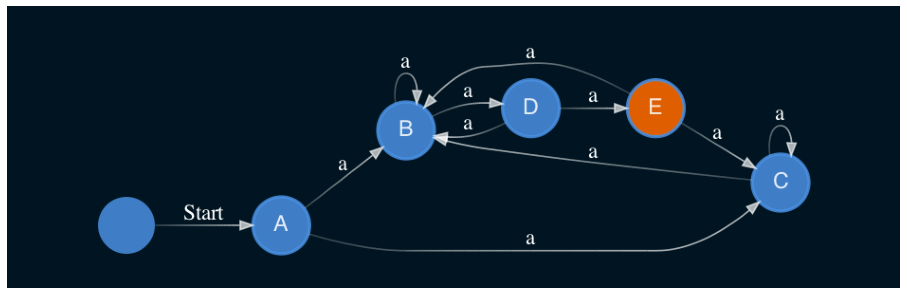

In [60]:
graph_attributes = {
    "rankdir": "LR",  # Change ranking direction to be horizontal
    "splines": "true",  # Do not curve edges, use straight lines instead
    # "bgcolor": "white",  # background color
    # "label": "An ugly plot\nto exemplify how many customisations are possible",
    # "fontcolor": "red",  # Setting label font
    "fontname": "Arial",  # Setting label font settings
    # "fontsize": 20,  # Setting LABEL font settings
    "pad": "0.8,0.3",  # setting a margin
    "dpi": 120,  # resolution
    "labeljust": "l",  # This sets the title to be at the left
    "labelloc": "t",  # This sets the title to be at the top
    # "nodesep": 0.2,  # separation between nodes with same rank
    # "ranksep": 1.1,  # This changes the distances between rank levels in hierarchy (For Dot and twopi only )
}

# Making all nodes hexagonal with black coloring
node_attributes = {
    node: {
        # "shape": "hexagon",
        "width": 0.5,
        "height": 0.5,
        # "fillcolor": "#000000",
        "penwidth": "2" ,
        "color": "#4a90e2d9",
        "fontsize": 14,
        "labelloc": "c",
    }
    for node in g.nodes
}


# Splitting two words with "\n"

for node in g.nodes:
    node_attributes[node]["label"] = node

# for u, v, w in g.edges(data="weight"):
#     edge_attributes[(u, v, 'color')] = 'white'

# Target nodes (ones with "Cost" in the name) are colored differently
for node in g.nodes:
    if "E" in node:  # We color nodes with "cost" in the name with a orange colour.
        node_attributes[node]["fillcolor"] = "#DF5F00"
    if " " in node:  # We color nodes with "cost" in the name with a orange colour.
        node_attributes[node]["penwidth"] = 0

edge_attributes = {
    (u, v): {
        "fontcolor": 'white',
        "fontlabel": "Arial"
    }
    for u, v, w in g.edges(data="label")
}

viz = plot_structure(g, prog="dot", node_attributes=node_attributes, edge_attributes=edge_attributes, graph_attributes=graph_attributes)
f = "test.png"
viz.draw(f)

import matplotlib.pyplot as plt

plt.figure(figsize=(16, 9))  # set figsize
img = plt.imread('test.png')
plt.axis("off")
plt.imshow(img)

In [ ]:
graph_attributes = {
    "splines": "spline",  # I use splies so that we have no overlap
    "ordering": "out",
    "ratio": "fill",  # This is necessary to control the size of the image
    "size": "16,9!",  # Set the size of the final image. (this is a typical presentation size)
    "label": "NFAe to DFA",
    "fontcolor": "#FFFFFFD9",
    "fontname": "Helvetica",
    "fontsize": 100,
    "labeljust": "l",
    "labelloc": "t",
    "pad": "1,1",
    "dpi": 200,
    "nodesep": 0.8,
    "ranksep": ".5 equally",
}

# Making all nodes hexagonal with black coloring
node_attributes = {
    node: {
        "shape": "hexagon",
        "width": 2.2,
        "height": 2,
        "fillcolor": "#000000",
        "penwidth": "10",
        "color": "#4a90e2d9",
        "fontsize": 35,
        "labelloc": "c",
    }
    for node in g.nodes
}

# Splitting two words with "\n"
for node in g.nodes:
    up_idx = [i for i, c in enumerate(node) if c.isupper()][-1]
    node_attributes[node]["label"] = node[:up_idx] + "\n" + node[up_idx:]

# Target nodes (ones with "Cost" in the name) are colored differently
for node in g.nodes:
    if "E" in node:  # We color nodes with "cost" in the name with a orange colour.
        node_attributes[node]["fillcolor"] = "#DF5F00"

# Customising edges
edge_attributes = {
    (u, v): {
        "penwidth": w * 20 + 2,  # Setting edge thickness
        "weight": int(5 * w),  # Higher "weight"s mean shorter edges
        "arrowsize": 2 - 2.0 * w,  # Avoid too large arrows
        "arrowtail": "dot",
    }
    for u, v, w in g.edges(data="weight")
}


viz = plot_structure(
    g,
    prog="dot",
    graph_attributes=graph_attributes,
    node_attributes=node_attributes,
    edge_attributes=edge_attributes,
)
f = "final_insurance_model.jpg"
viz.draw(f)
Image(f)

In [ ]:
# Remove attributes fixing the size of figure
del graph_attributes["size"]
del graph_attributes["ratio"]

# minor changes on distancing
graph_attributes["nodesep"] = 2
graph_attributes["ranksep"] = "1.1 equally"
graph_attributes["label"] = "NFAe to DFA"

for node in g.nodes:
    if "E" in node:  # We color nodes with "cost" in the name with a orange colour.
        node_attributes[node]["fillcolor"] = "#DF5F00"

viz = plot_structure(
    g,
    prog="dot",
    graph_attributes=graph_attributes,
    node_attributes=node_attributes,
    edge_attributes=edge_attributes,
)
display(Image(viz.draw(format="jpg")))

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams["figure.dpi"] = 120

fig = plt.figure(figsize=(15, 8))  # set figsize
nx.draw_networkx(g)

In [ ]:
fig = plt.figure(figsize=(15, 8))  # set figsize
ax = fig.add_subplot(1, 1, 1)
ax.set_facecolor("#001521")  # set backgrount

### run a layout algorithm to set the position of nodes
# pos = nx.drawing.layout.circular_layout(g) # various layouts available
# pos = nx.drawing.layout.kamada_kawai_layout(g)
# pos = nx.drawing.layout.planar_layout(g)
# pos = nx.drawing.layout.random_layout(g)
# pos = nx.drawing.layout.rescale_layout(g)
# pos = nx.drawing.layout.shell_layout(g)
# pos = nx.drawing.layout.spring_layout(g)
# pos = nx.drawing.layout.spectral_layout(g)
# pos = nx.drawing.layout.spiral_layout(g)
# pos = nx.drawing.nx_agraph.graphviz_layout(g, prog="neato")
pos = nx.drawing.nx_agraph.graphviz_layout(g, prog="dot")

# We can change the position of specific nodes
pos["Cushioning"] = (705.82, 200.0)
pos["SeniorTrain"] = (500.82, 600.0)

# add nodes to figure
nx.draw_networkx_nodes(
    g,
    pos,
    node_shape="H",
    node_size=1000,
    linewidths=3,
    edgecolors="#4a90e2d9",
    node_color=["black" if "Cost" not in el else "#DF5F00" for el in g.nodes],
)
# add labels
nx.draw_networkx_labels(
    g,
    pos,
    font_color="#FFFFFFD9",
    font_weight="bold",
    font_family="Helvetica",
    font_size=10,
)
# add edges
nx.draw_networkx_edges(
    g,
    pos,
    edge_color="white",
    node_shape="H",
    node_size=2000,
    width=[w + 0.1 for _, _, w, in g.edges(data="weight")],
)

plt.text(660, 650, "The structure of our\n Insurance model", color="white", size=20)
